In [12]:
# Importar librerías necesarias
import pandas as pd
from pycaret.classification import *
from ydata_profiling import ProfileReport
from pycaret.classification import save_model
import os
import matplotlib.pyplot as plt
from pycaret.classification import plot_model
# import dagshub

In [13]:
# Cargar el archivo CSV en un DataFrame
data = '../../data/data_Ing_Caracteristicas.csv'
df = pd.read_csv(data)

In [ ]:
# Ajustar las opciones de visualización de pandas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)        # Ajustar el ancho de la salida para evitar cortes
pd.set_option('display.max_colwidth', None) # Mostrar el contenido completo de cada columna

---

In [15]:
df.head()

,Edad,Salario_Mensual,Num_Tarjetas_Credito,Tasa_Interes,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Edad_Historial_Credito,Total_Cuota_Mensual,Inversion_Mensual,Saldo_Mensual,Comportamiento_Alto gasto con pagos de gran valor,Comportamiento_Alto gasto con pagos de valor medio,Comportamiento_Alto gasto con pagos de pequeño valor,Comportamiento_Bajo gasto con pagos de gran valor,Comportamiento_Bajo gasto con pagos de valor medio,Comportamiento_Bajo gasto con pagos de pequeño valor,Mezcla_Bad,Mezcla_Good,Mezcla_Standard,Pago_Minimo_No,Pago_Minimo_Yes,Ocupacion_Architect,Ocupacion_Developer,Ocupacion_Doctor,Ocupacion_Engineer,Ocupacion_Entrepreneur,Ocupacion_Journalist,Ocupacion_Lawyer,Ocupacion_Manager,Ocupacion_Mechanic,Ocupacion_Media_Manager,Ocupacion_Musician,Ocupacion_Scientist,Ocupacion_Teacher,Ocupacion_Writer,Puntaje_Credito
0,34.0,12187.22,5.0,8.0,5.0,8.0,7.1,3.0,1303.01,213.0,246.992319,168.413703,1043.315978,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
1,34.0,12187.22,5.0,8.0,13.0,6.0,7.1,3.0,1303.01,214.0,246.992319,168.413703,998.869297,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
2,34.0,12187.22,5.0,8.0,8.0,7.0,11.1,3.0,1303.01,215.0,246.992319,168.413703,715.741367,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
3,34.0,12187.22,5.0,8.0,8.0,5.0,9.1,3.0,1303.01,216.0,246.992319,168.413703,426.513411,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
4,34.0,12187.22,5.0,8.0,10.0,5.0,7.1,3.0,1303.01,217.0,246.992319,168.413703,810.782153,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good


---

In [16]:
# Lista de columnas numéricas que no son one-hot encoded
columnas_numericas = [
    'Edad',
    'Salario_Mensual',
    'Num_Tarjetas_Credito',
    'Tasa_Interes',
    'Retraso_Pago',
    'Num_Pagos_Retrasados',
    'Cambio_Limite_Credito',
    'Num_Consultas_Credito',
    'Deuda_Pendiente',
    'Edad_Historial_Credito',
    'Total_Cuota_Mensual',
    'Inversion_Mensual',
    'Saldo_Mensual'
]

In [17]:
# Crear el DataFrame filtrado seleccionando las columnas del DataFrame original
df_filtrado = df[columnas_numericas]

In [18]:
# Generar el informe de EDA
profile = ProfileReport(df_filtrado, title="Informe EDA", explorative=True)

In [19]:
# Guardar el informe como un archivo HTML
profile.to_file("../../Reportes/EDA_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
# Iniciar setup en PyCaret con el parámetro 'log_experiment' para poder trabajar en MlFlow y/o DagsHub
s = setup(df,                          # 'df' es el DataFrame que contiene los datos a analizar
          target = 'Puntaje_Credito',  # Define la columna objetivo
          session_id=438,              # Establece una semilla fija (seed) para garantizar que los resultados sean reproducibles en cada ejecución
          experiment_name = 'PC_log_data_True', # Nombre del experimento
          log_experiment = True,       # Habilita el registro automático del experimento en MLflow
        #   log_experiment = 'dagshub',  # Habilita el registro automático del experimento en DagsHub
          log_plots = True,            # Activa el guardado de gráficos generados por PyCaret
          # log_data = True              # Guarda los conjuntos de datos de entrenamiento y prueba
          )

,Description,Value
0,Session id,438
1,Target,Puntaje_Credito
2,Target type,Multiclass
3,Target mapping,"Good: 0, Poor: 1, Standard: 2"
4,Original data shape,"(55438, 39)"
5,Transformed data shape,"(55438, 39)"
6,Transformed train set shape,"(38806, 39)"
7,Transformed test set shape,"(16632, 39)"
8,Numeric features,38
9,Preprocess,True


2025/03/11 11:59:07 INFO mlflow.tracking.fluent: Experiment with name 'PC_log_data_True' does not exist. Creating a new experiment.


In [21]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8138,0.9040,0.8138,0.8144,0.8134,0.6834,0.6841,1.7310
et,Extra Trees Classifier,0.8015,0.8920,0.8015,0.8015,0.8012,0.6616,0.6618,1.2110
catboost,CatBoost Classifier,0.7913,0.8850,0.7913,0.7916,0.7912,0.6453,0.6456,8.8300
lightgbm,Light Gradient Boosting Machine,0.7741,0.8756,0.7741,0.7750,0.7744,0.6176,0.6178,0.5870
dt,Decision Tree Classifier,0.7513,0.7825,0.7513,0.7513,0.7512,0.5760,0.5761,0.2040
gbc,Gradient Boosting Classifier,0.7305,0.0000,0.7305,0.7336,0.7313,0.5444,0.5448,6.1230
knn,K Neighbors Classifier,0.7230,0.8392,0.7230,0.7222,0.7221,0.5282,0.5286,0.4530
ada,Ada Boost Classifier,0.6799,0.0000,0.6799,0.6823,0.6806,0.4599,0.4604,0.6830
lda,Linear Discriminant Analysis,0.6680,0.0000,0.6680,0.6823,0.6704,0.4562,0.4592,0.0760
ridge,Ridge Classifier,0.6660,0.0000,0.6660,0.6766,0.6681,0.4480,0.4498,0.0720


El mejor modelo obtenido fue **Random Forest Classifier**, con un rendimiento destacado en varias métricas:  
- **Accuracy (Precisión):** 0.8138, lo que significa que el modelo clasifica correctamente más del 81% de las predicciones.  
- **AUC (Área bajo la curva ROC):** 0.9040, mostrando una excelente capacidad para distinguir entre las clases.  
- **Recall (Sensibilidad):** 0.8138, indicando que el modelo identifica correctamente la mayoría de los casos positivos.  
- **F1-Score:** 0.8134, reflejando un buen equilibrio entre precisión y recall.  
Además, el tiempo de entrenamiento (**TT**) fue de 1.724 segundos, lo que me parece eficiente para este conjunto de datos. En resumen, este modelo ofrece un desempeño sólido y equilibrado, lo que lo hace muy adecuado para resolver mi problema de clasificación.


In [22]:
# Ajustar hiperparámetros del mejor modelo encontrado
tuned_best = tune_model(
    best_model,          # Modelo base a ajustar
    optimize='Accuracy',      # Optimizar según AUC (puedes cambiar a 'Accuracy', 'F1', etc.)
    n_iter=10,           # Número de iteraciones para Random Search (ajusta según tiempo/computación)
    choose_better=True   # Asegura que se elija el mejor modelo entre el original y el ajustado
)

# Mostrar los resultados del modelo ajustado
tuned_best

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7279,0.8449,0.7279,0.7369,0.7299,0.5474,0.5489
1,0.7287,0.8493,0.7287,0.7422,0.7319,0.5534,0.5562
2,0.7416,0.8529,0.7416,0.7521,0.7438,0.5727,0.5749
3,0.7315,0.8455,0.7315,0.7429,0.7336,0.5579,0.5606
4,0.7186,0.8324,0.7186,0.7272,0.7201,0.5343,0.5362
5,0.7168,0.8395,0.7168,0.7279,0.7193,0.5316,0.5336
6,0.7343,0.8532,0.7343,0.7469,0.7374,0.5617,0.5642
7,0.7255,0.8477,0.7255,0.7357,0.7280,0.5428,0.5444
8,0.7160,0.8453,0.7160,0.7271,0.7186,0.5292,0.5310


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=438, verbose=0,
                       warm_start=False)

# Resultados del Ajuste de Hiperparámetros

He revisado los resultados obtenidos tras ajustar los hiperparámetros del modelo `Random Forest` utilizando PyCaret. Aquí te comparto mi análisis:


### **1. Métricas Promedio**
- **Accuracy**: Logré un valor promedio de **0.7220** en validación cruzada. Esto significa que, en promedio, el modelo clasifica correctamente aproximadamente el **72.20%** de las muestras.
- **AUC**: El área bajo la curva ROC promedio fue de **0.8385**, lo cual indica que el modelo tiene una buena capacidad para distinguir entre las clases.
- **Recall**: Con un promedio de **0.7220**, el modelo es capaz de identificar correctamente la mayoría de las instancias positivas.
- **Precisión (Prec.)**: La precisión promedio fue de **0.7253**, lo que sugiere que cuando el modelo predice una clase como positiva, esta predicción es correcta en aproximadamente el **72.53%** de los casos.
- **F1-Score**: El F1-Score promedio fue de **0.7226**, lo que refleja un equilibrio razonable entre precisión y recall.


### **2. Variabilidad de las Métricas**
- Observé una desviación estándar baja en todas las métricas (**~0.0064**), lo que indica que el modelo es consistente a través de los diferentes folds de validación cruzada. Esta estabilidad es un buen indicador de robustez.


### **3. Comparación entre Modelo Original y Ajustado**
- Según los resultados, el modelo original superó al modelo ajustado. Esto puede deberse a varias razones:
  - Los hiperparámetros predeterminados ya eran óptimos para este conjunto de datos.
  - El espacio de búsqueda utilizado en el ajuste (`tune_model`) no encontró combinaciones significativamente mejores.
- Decidí retornar el modelo original porque mostró un mejor rendimiento general.


### **4. Configuración Final del Modelo**
El modelo final retornado es un **RandomForestClassifier** con los siguientes parámetros clave:
- **Criterio de división**: Gini.
- **Número de árboles**: 100 (`n_estimators=100`).
- **Profundidad máxima**: Sin límite (`max_depth=None`).
- **Número de características por split**: Raíz cuadrada del total de características (`max_features='sqrt'`).
- **Semilla aleatoria**: Fijada en `438` para reproducibilidad.


### **5. Reflexión Personal**
En mi opinión, los resultados son satisfactorios, especialmente considerando el alto valor de AUC (**0.8385**), que refleja una buena capacidad de discriminación del modelo. Sin embargo, si quisiera mejorar aún más el rendimiento, podría explorar:
- Un espacio de búsqueda más amplio para el ajuste de hiperparámetros.
- Balancear las clases si existe desequilibrio en los datos.
- Probar otros algoritmos avanzados como `LightGBM` o `XGBoost`.

Por ahora, estoy satisfecho con el rendimiento del modelo ajustado y su consistencia en validación cruzada.

---

---

# **Análisis y Visualización del Rendimiento del Modelo Random Forest: Matriz de Confusión, Reporte de Clasificación, Curva ROC y Métricas Clave**

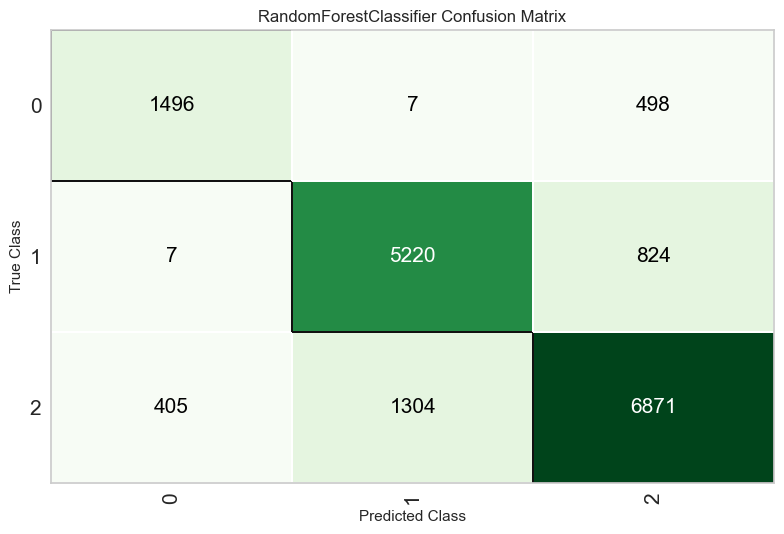

In [23]:
plot_model(best_model, plot="confusion_matrix")

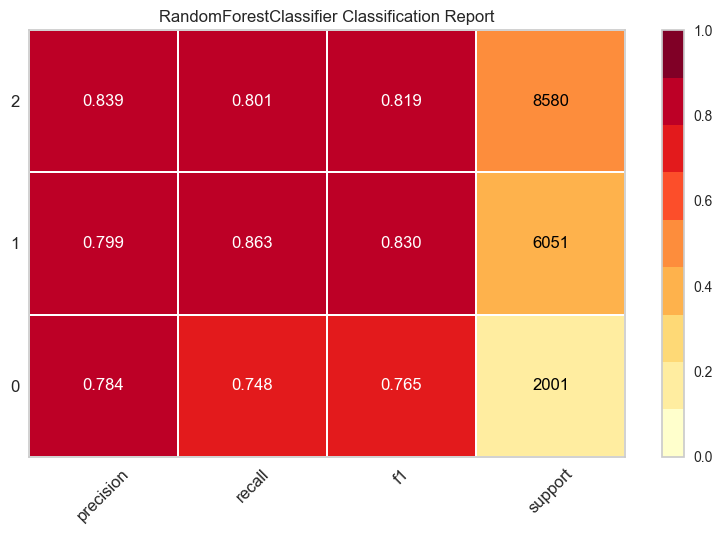

In [24]:
plot_model(best_model, plot="class_report")

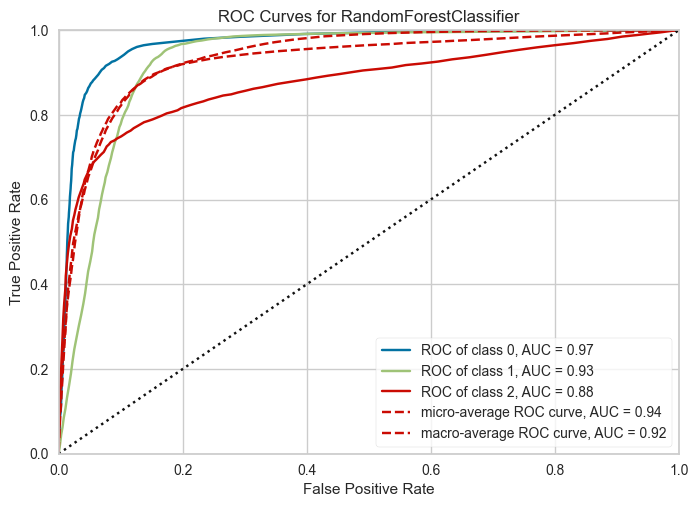

In [25]:
plot_model(best_model, plot="auc")

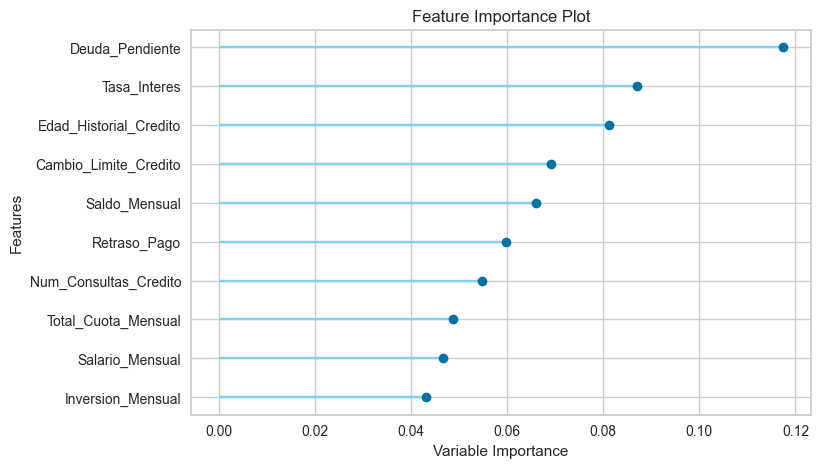

In [26]:
plot_model(best_model, plot="feature") 

---

In [27]:
# # Guardar las gráficas como archivos temporales
# plot_model(best_model, plot="confusion_matrix", save=True)  # Matriz de confusión   
# plot_model(best_model, plot="class_report", save=True)      # Reporte de clasificación
# plot_model(best_model, plot="auc", save=True)               # Curva ROC (AUC)
# plot_model(best_model, plot="feature", save=True)           # Importancia de características

# # Cargar las imágenes guardadas
# confusion_matrix_path = "Confusion Matrix.png"  # Nombre predeterminado de la imagen generada
# class_report_path = "Class Report.png"          # Nombre predeterminado de la imagen generada
# auc_path = "AUC.png"                            # Nombre predeterminado de la imagen generada
# feature_path = "Feature Importance.png"         # Nombre predeterminado de la imagen generada

# # Crear una figura con cuatro subgráficos (2 filas, 2 columnas)
# fig, axes = plt.subplots(2, 2, figsize=(16, 9))  # Ajusta el tamaño para acomodar las 4 gráficas

# # Mostrar la matriz de confusión en el primer subgráfico
# axes[0, 0].imshow(plt.imread(confusion_matrix_path))
# axes[0, 0].axis('off')  # Desactivar ejes
# axes[0, 0].set_title("Matriz de Confusión")

# # Mostrar el reporte de clasificación en el segundo subgráfico
# axes[0, 1].imshow(plt.imread(class_report_path))
# axes[0, 1].axis('off')  # Desactivar ejes
# axes[0, 1].set_title("Reporte de Clasificación")

# # Mostrar la curva ROC (AUC) en el tercer subgráfico
# axes[1, 0].imshow(plt.imread(auc_path))
# axes[1, 0].axis('off')  # Desactivar ejes
# axes[1, 0].set_title("Curva ROC (AUC)")

# # Mostrar la importancia de características en el cuarto subgráfico
# axes[1, 1].imshow(plt.imread(feature_path))
# axes[1, 1].axis('off')  # Desactivar ejes
# axes[1, 1].set_title("Importancia de Características")

# # Ajustar el diseño para evitar superposiciones
# plt.tight_layout()

# # Mostrar las gráficas combinadas
# plt.show()

# # Eliminar los archivos temporales después de usarlos
# os.remove(confusion_matrix_path)
# os.remove(class_report_path)
# os.remove(auc_path)
# os.remove(feature_path)

---

#### **Finalizar el Modelo**

In [28]:
final_best = finalize_model(best_model)

---

#### **Crear Modelos de ML**

---

#### Guardado del Modelo Original

In [29]:
# Crear una carpeta para guardar el modelo mas optimo
os.makedirs('modelos_Generados', exist_ok=True)

In [30]:
# Guardar el modelo original en la carpeta 'modelos_Generados'
save_model(best_model, 'modelos_Generados/Random_Forest_Classifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Edad', 'Salario_Mensual',
                                              'Num_Tarjetas_Credito',
                                              'Tasa_Interes', 'Retraso_Pago',
                                              'Num_Pagos_Retrasados',
                                              'Cambio_Limite_Credito',
                                              'Num_Consultas_...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='sqrt',
                         

---

#### **Cargar Modelo**

In [31]:
loaded_bestmodel = load_model('modelos_Generados/Random_Forest_Classifier')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\JORGEL~1\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Edad', 'Salario_Mensual',
                                             'Num_Tarjetas_Credito',
                                             'Tasa_Interes', 'Retraso_Pago',
                                             'Num_Pagos_Retrasad...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,

In [32]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

TransformerWrapperWithInverse(exclude=None, include=None,
                              transformer=LabelEncoder())

# **Deployment**

In [34]:
!mlflow ui

^C
